In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.patches as patches
import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow

%matplotlib inline

In [40]:
def plume_maps(carp,grid,stns, ddmmmyy, rdir,humandate, dss_sig):
    
    tsal = grid.variables['vosaline'][0,0,:,:]
    ttemp = grid.variables['votemper'][0,0,:,:]
    tdic = carp.variables['dissolved_inorganic_carbon'][0,0,:,:]
    tta = carp.variables['total_alkalinity'][0,0,:,:]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-6
    tdra = np.ravel(tdic) * 1e-6
    tzero = np.zeros_like(tsra)

    response_tup = mocsy.mvars(temp=ttera, sal=tsra, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/kg', optt='Tinsitu', optp='db',
                        optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(898,398)
    OmA = OmegaA.reshape(898,398)
    
    surf_dat = [tsal, tdic, tta, ttemp, pHr, OmA]
    
    vmins = [25,1800,1800,5,7.5,0]
    vmaxs = [32,2200,2200,15,8.5,2]
    msk = [0,0,0,0,1e20,1e20]
    cl = ['salinity psu', 'DIC umol/kg', 'TA umol/kg', 'temp deg C', 'pH', 'Omega A']
    t_cmap = [cm.cm.haline, cm.cm.matter, cm.cm.matter, cm.cm.thermal, cm.cm.speed, cm.cm.curl]

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = \
    plt.subplots(figsize=(17, 8.5) , nrows=2, ncols=3)

    viz_tools.set_aspect(ax1)
    viz_tools.set_aspect(ax2)
    viz_tools.set_aspect(ax3)
    viz_tools.set_aspect(ax4)
    viz_tools.set_aspect(ax5)
    viz_tools.set_aspect(ax6)
    
    y1 = 390
    y2 = 460
    x1 = 240
    x2 = 398 
    i = 0
    tplt0 = surf_dat[i][y1:y2,x1:x2]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax1)
    cbar.set_label(cl[i], fontsize = 20 )
    ax1.set_xticks([])
    ax1.set_yticks([])

    i = 1
    tplt0 = surf_dat[i][y1:y2,x1:x2]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax2.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax2)
    cbar.set_label(cl[i], fontsize = 20 )
    ax2.set_xticks([])
    ax2.set_yticks([])

    i = 2
    tplt0 = surf_dat[i][y1:y2,x1:x2]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax3.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax3)
    cbar.set_label(cl[i], fontsize = 20 )
    ax3.set_xticks([])
    ax3.set_yticks([])
    
    i = 3
    tplt0 = surf_dat[i][y1:y2,x1:x2]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax4.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax4)
    cbar.set_label(cl[i], fontsize = 20 )
    ax4.set_xticks([])
    ax4.set_yticks([])
    
    i = 4
    tplt0 = surf_dat[i][y1:y2,x1:x2]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax5.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax5)
    cbar.set_label(cl[i], fontsize = 20 )
    ax5.set_xticks([])
    ax5.set_yticks([])
    
    i = 5
    tplt0 = surf_dat[i][y1:y2,x1:x2]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax6.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax6)
    cbar.set_label(cl[i], fontsize = 20 )
    ax6.set_xticks([])
    ax6.set_yticks([])
    
    cols = []
    xs = []
    ys = []
    stn_in = []
    for s in stns:
        col = stns[s]['color']
        x = stns[s]['x']
        y = stns[s]['y']
        stn = stns[s]['code']
        cols.append(col)
        xs.append(x)
        ys.append(y)
        stn_in.append(stn)


    #tcmap.set_bad('white')
    st = 'Fraser Plume Carbonate Chemistry, ' + humandate
    plt.suptitle(st,fontsize=20)
    
    
    fname = rdir + f'{ddmmmyy}_map_' + dss_sig +'.png'

    fig.savefig(fname)
    #plt.show()
    plt.close()

In [41]:
carp = nc.Dataset('/results/SalishSea/hindcast/01jan16/SalishSea_1d_20160101_20160101_carp_T.nc')
grid = nc.Dataset('/results/SalishSea/hindcast/01jan16/SalishSea_1d_20160101_20160101_grid_T.nc')

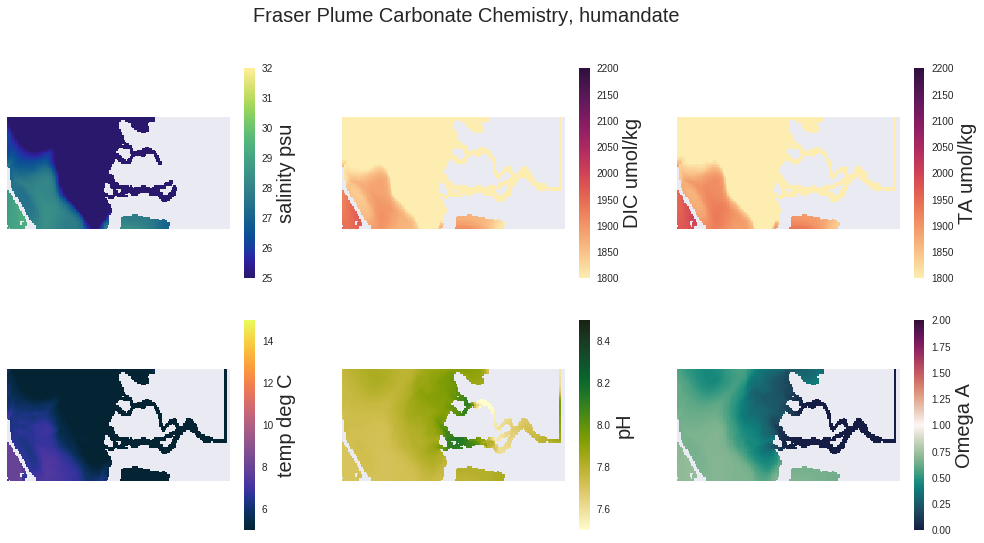

In [42]:
surface_maps(carp,grid,cs.STATIONS, '01jan16', 'rdir','humandate', '011')

In [47]:
def CCCma_pipe(prof = True, nc = True, surfmap = True, plume = True, pspace = True):
    

    
    print('ANALYZING ANALYZING ')
    print('prof: ', prof, ', nc: ', nc, ', surfmap: ', surfmap, ', plume: ', plume, ', pspace: ', pspace)
    
CCCma_pipe(prof = False, nc = False,)

ANALYZING ANALYZING 
prof:  False , nc:  False , surfmap:  True , plume:  True , pspace:  True
